## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    GradientBoostingClassifier,
    AdaBoostClassifier,
    RandomForestClassifier
)
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier

# importing eluvation matrecis
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv(r'..\Network_Data\phisingData.csv')

#### Show Top 5 Records

In [3]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


### dropping duplicates

In [4]:
df = df.drop_duplicates()

#### Preparing X and Y variables

In [5]:
X = df.drop(columns=['Result'],axis=1)
X.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [6]:
y = df['Result']
y=y.replace(-1,0)
y

0        0
1        0
2        0
3        0
4        1
        ..
11037    0
11045    1
11048    1
11049    0
11054    0
Name: Result, Length: 5849, dtype: int64

In [7]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train.shape, X_test.shape

((4679, 30), (1170, 30))

#### Create an Evaluate Function to give all metrics after model Training

In [9]:
def evaluate_model(true, predicted):
    f1_scores = f1_score(true, predicted)
    recall = recall_score(true, predicted)
    precision = precision_score(true, predicted)
    confusion_mat = confusion_matrix(true, predicted)
    return f1_scores, recall, precision, confusion_mat

In [10]:
models = {
                "Random Forest": RandomForestClassifier(verbose=1),
                "Decision Tree": DecisionTreeClassifier(),
                "Gradient Boosting": GradientBoostingClassifier(verbose=1),
                "Logistic Regression": LogisticRegression(verbose=1),
                "AdaBoost": AdaBoostClassifier(),
                "KNeighbors Classifier": KNeighborsClassifier(),
                "Xgboost": XGBClassifier(),
                "xg_rf_classifier":XGBRFClassifier(),
                "catboost": CatBoostClassifier(),
            }


model_list = []
f1_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_f1 , model_train_recall, model_train_precision, model_train_matrix = evaluate_model(y_train, y_train_pred)

    model_test_f1 , model_test_recall, model_test_precision, model_test_matrix= evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- f1 score: {:.4f}".format(model_train_f1))
    print("- recall score: {:.4f}".format(model_train_recall))
    print("- precision Score: {:.4f}".format(model_train_precision))
    print("- confusion matrix :\n {}".format(model_train_matrix))

    print('----------------------------------')
    
    print("- f1 score: {:.4f}".format(model_test_f1))
    print("- recall score: {:.4f}".format(model_test_recall))
    print("- precision Score: {:.4f}".format(model_test_precision))
    print("- confusion matrix :\n {}".format(model_test_matrix))
    f1_list.append(model_test_f1)
    
    print('='*35)
    print('\n')

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Random Forest
Model performance for Training set
- f1 score: 0.9908
- recall score: 0.9921
- precision Score: 0.9895
- confusion matrix :
 [[2375   24]
 [  18 2262]]
----------------------------------
- f1 score: 0.9495
- recall score: 0.9582
- precision Score: 0.9411
- confusion matrix :
 [[587  33]
 [ 23 527]]


Decision Tree
Model performance for Training set
- f1 score: 0.9907
- recall score: 0.9816
- precision Score: 1.0000
- confusion matrix :
 [[2399    0]
 [  42 2238]]
----------------------------------
- f1 score: 0.9234
- recall score: 0.9200
- precision Score: 0.9267
- confusion matrix :
 [[580  40]
 [ 44 506]]


      Iter       Train Loss   Remaining Time 
         1           1.2489            1.66s
         2           1.1370            1.00s
         3           1.0440            0.75s
         4           0.9659            0.66s
         5           0.8996            0.58s
         6           0.8432            0.52s
         7           0.7947            0.50s
       

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Logistic Regression
Model performance for Training set
- f1 score: 0.9192
- recall score: 0.9259
- precision Score: 0.9127
- confusion matrix :
 [[2197  202]
 [ 169 2111]]
----------------------------------
- f1 score: 0.9275
- recall score: 0.9418
- precision Score: 0.9136
- confusion matrix :
 [[571  49]
 [ 32 518]]


AdaBoost
Model performance for Training set
- f1 score: 0.9310
- recall score: 0.9443
- precision Score: 0.9181
- confusion matrix :
 [[2207  192]
 [ 127 2153]]
----------------------------------
- f1 score: 0.9267
- recall score: 0.9309
- precision Score: 0.9225
- confusion matrix :
 [[577  43]
 [ 38 512]]


KNeighbors Classifier
Model performance for Training set
- f1 score: 0.9464
- recall score: 0.9404
- precision Score: 0.9525
- confusion matrix :
 [[2292  107]
 [ 136 2144]]
----------------------------------
- f1 score: 0.9094
- recall score: 0.9036
- precision Score: 0.9153
- confusion matrix :
 [[574  46]
 [ 53 497]]


Xgboost
Model performance for Training set


## Results

In [11]:
pd.DataFrame(list(zip(model_list, f1_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,Xgboost,0.958258
8,catboost,0.955656
0,Random Forest,0.949550
2,Gradient Boosting,0.941389
3,Logistic Regression,0.927484
4,AdaBoost,0.926697
1,Decision Tree,0.923358
5,KNeighbors Classifier,0.909424
7,xg_rf_classifier,0.908127


In [12]:
classi_model = XGBClassifier(fit_intercept=True)
classi_model = classi_model.fit(X_train, y_train)
y_pred = classi_model.predict(X_test)
score = f1_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 95.83


c:\Users\USER 11\.conda\envs\networkenv\lib\site-packages\xgboost\training.py:199: UserWarning: [11:19:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "fit_intercept" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


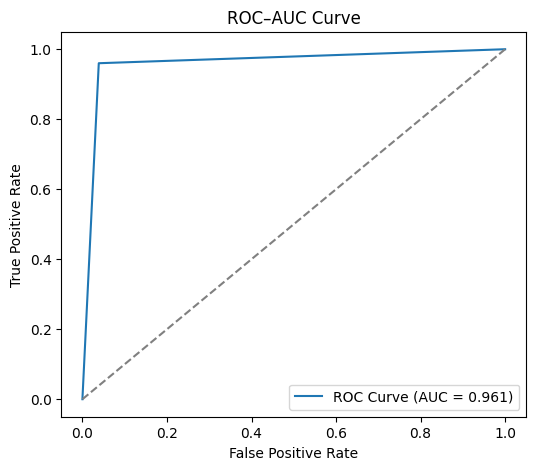

In [13]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve")
plt.legend()
plt.show()


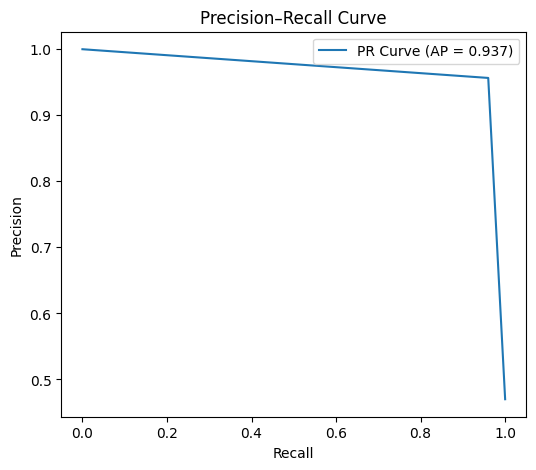

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"PR Curve (AP = {avg_precision:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.show()

### ROC–AUC and Precision–Recall Analysis

The ROC–AUC curve evaluates the model’s ability to distinguish between phishing and legitimate websites across different classification thresholds.  
An AUC score of **0.961** indicates excellent class separability, meaning the model can reliably rank phishing websites higher than legitimate ones.

The Precision–Recall curve focuses on phishing detection performance, where false negatives are critical.  
An average precision score of **0.937** shows that the model maintains high precision while achieving high recall, effectively detecting phishing websites with minimal false alarms.

Together, these results confirm that the model generalizes well and is suitable for real-world phishing detection scenarios.
